Apply appropriate ML algorithm on a dataset collected by obtaining the person’s information like age, gender, annual income, spending score, work experience… to predict the person’s profession.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

a) Reading from dataset

In [4]:
data = pd.read_csv("/content/Customers - Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


b) Checking for null values in dataset(if any) and dropping them

In [5]:
data.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [6]:
data.dropna(how='any', subset=['Profession'], inplace=True)

c) Train-test Splitting the dataset, Scaling and Applying KNN algorithm

In [7]:
X = data[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience']]
y = data['Profession']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classify = KNeighborsClassifier(n_neighbors = 4)
classify.fit(X_train, y_train)

y_pred = classify.predict(X_test)

d) Displaying the predicted values

In [10]:
sample1 = [[29, 99000, 70, 1]]
print(classify.predict(sample1))

sample2 = [[21, 25000, 35, 2]]
print(classify.predict(sample2))

sample3 = [[32, 50000, 42, 1]]
print(classify.predict(sample3))

['Artist']
['Engineer']
['Doctor']


e) Visualizing the actual vs predicted values using confusing matrix and depicting the accuracy, precision, recall and f1-score

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print()
print("Classification Report")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100)

Confusion Matrix
[[76 11  8  4  2 11  0  4  0]
 [21  0  2  4  2  2  1  0  0]
 [22  2  4  4  2  4  1  0  0]
 [33  2  2  4  1  5  1  0  0]
 [18  4  0  1  0  7  0  0  0]
 [43  5  3  7  3  7  0  1  1]
 [ 8  0  2  1  2  3  0  0  0]
 [19  2  0  2  0  1  0  0  0]
 [ 9  2  3  1  1  2  0  0  0]]

Classification Report
               precision    recall  f1-score   support

       Artist       0.31      0.66      0.42       116
       Doctor       0.00      0.00      0.00        32
     Engineer       0.17      0.10      0.13        39
Entertainment       0.14      0.08      0.11        48
    Executive       0.00      0.00      0.00        30
   Healthcare       0.17      0.10      0.12        70
    Homemaker       0.00      0.00      0.00        16
       Lawyer       0.00      0.00      0.00        24
    Marketing       0.00      0.00      0.00        18

     accuracy                           0.23       393
    macro avg       0.09      0.10      0.09       393
 weighted avg       0.15   

f) Plotting the confusion matrix

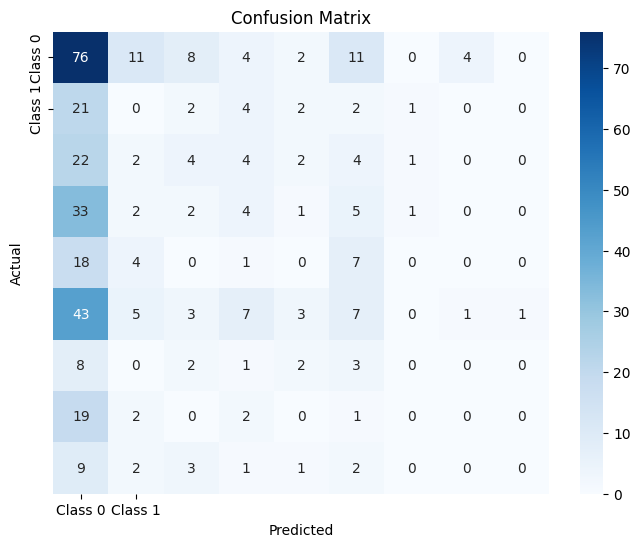

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()